In [1]:
##########
# Importe les modules
##########

import pandas as pd
import requests
import gzip
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2

/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
username = 'citus'   
password = 'floox2024!'   
hostname = 'c-groupe3.3i2a7yekjrai5q.postgres.cosmos.azure.com'   
port     = '5432'  
db = 'netfloox' 
sslmode = "require"
conn_string = f"host={hostname} dbname={db} user={username} password={password} sslmode={sslmode}"
conn = psycopg2.connect(conn_string)
cursor = conn.cursor()

In [6]:
username = 'postgres'   
password = 'floox2024!'   
hostname = 'localhost'   
port     = '5432'  
db = 'netfloox' 
conn_string = f"host={hostname} dbname={db} user={username} password={password} "
conn = psycopg2.connect(conn_string)
cursor = conn.cursor()

In [92]:
cursor.execute('''SELECT tb."originalTitle", tr."numVotes", tr."averageRating"
FROM "titleRatings" tr
JOIN 
"titleBasics" tb  ON tb."tconst" = tr."tconst" 
where 
     tb."titleType" = 'movie' AND  "numVotes" >1000
ORDER BY "averageRating" DESC, "numVotes" DESC 
LIMIT 20 ''' )
rate= cursor.fetchall()
rating = pd.DataFrame(rate , columns=[ "originalTitle", "numVotes", "averagerating"] )
rating

,originalTitle,numVotes,averagerating
0,Under Armour: The Only Way Is Through,1647,9.7
1,Wendigo,1492,9.7
2,Uruttu Tech,10460,9.6
3,Janam,2013,9.4
4,The Shawshank Redemption,2851572,9.3
5,The Silence of Swastika,10495,9.3
6,Jibon Theke Neya,2233,9.3
7,Ganaa,2233,9.3
8,The Godfather,1986874,9.2
9,12th Fail,90901,9.2


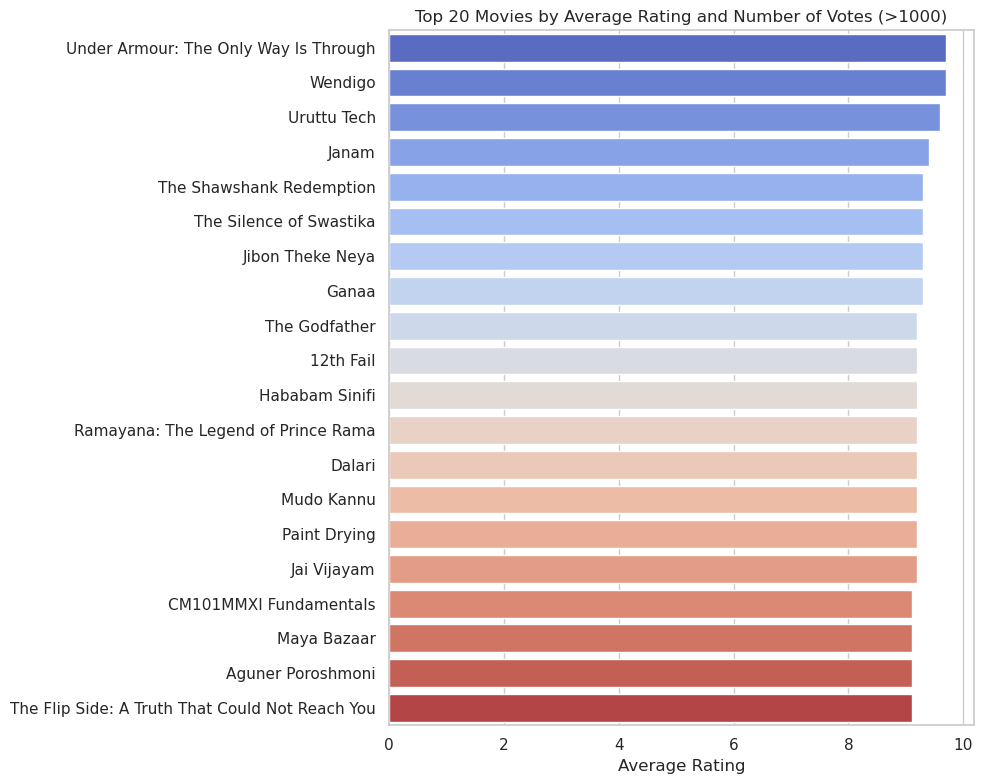

In [40]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='averagerating', y='originalTitle', data=rating, palette='coolwarm', ax=ax)

plt.xlabel('Average Rating')  
plt.ylabel('')  
plt.title('Top 20 Movies by Average Rating and Number of Votes (>1000)')   
ax.set(ylabel="")   

plt.tight_layout()
plt.show()

In [4]:
cursor.execute('''SELECT tb."originalTitle", tr."numVotes", tr."averageRating"
FROM "titleRatings" tr
JOIN 
"titleBasics" tb  ON tb."tconst" = tr."tconst" 
where 
     tb."titleType" = 'movie'
ORDER BY  "numVotes" DESC ,"averageRating" DESC
LIMIT 20 ''' )
ratev= cursor.fetchall()
ratingv = pd.DataFrame(ratev , columns=[ "originalTitle", "numVotes", "averagerating"] )
ratingv

,originalTitle,numVotes,averagerating
0,The Shawshank Redemption,2851572,9.3
1,The Dark Knight,2832886,9.0
2,Inception,2515111,8.8
3,Fight Club,2286960,8.8
4,Forrest Gump,2224625,8.8
5,Pulp Fiction,2189108,8.9
6,Interstellar,2050463,8.7
7,The Matrix,2026128,8.7
8,The Godfather,1986874,9.2
9,The Lord of the Rings: The Fellowship of the Ring,1980960,8.9


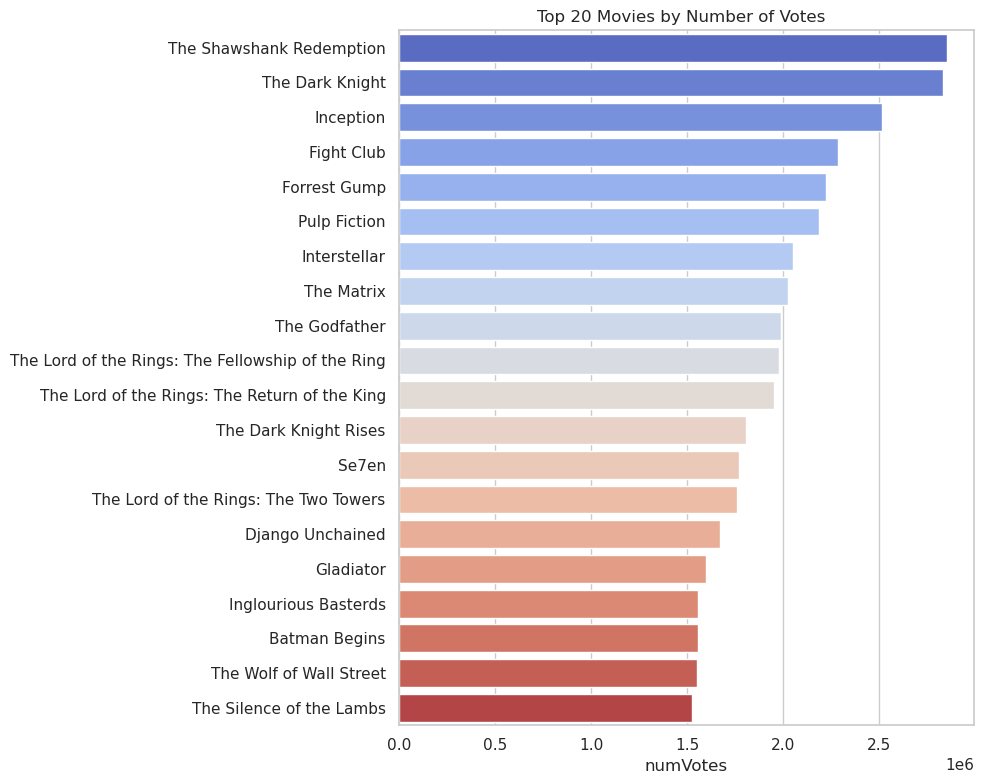

In [5]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='numVotes', y='originalTitle', data=ratingv, palette='coolwarm', ax=ax)

plt.xlabel('numVotes')  
plt.ylabel('')  
plt.title('Top 20 Movies by Number of Votes  ')   
ax.set(ylabel="")   

plt.tight_layout()
plt.show()

In [16]:
cursor.execute('''SELECT
    tb."originalTitle" AS Titre,
    tb."startYear" AS Année,
    tb."genres" AS Genre
FROM
    "titleBasics" tb
where 
 tb."titleType" = 'movie' AND tb."startYear" is not null AND tb."startYear" in (2021 ,2022 ,2023, 2024) 
group by Genre , Titre, Année
order by Année  ASC
; ''' )
at= cursor.fetchall()
at = pd.DataFrame(at , columns=[ "originalTitle", "Année", "Genre"] )
at

,originalTitle,Année,Genre
0,1945 Great War,2021,Action
1,20Banz 2,2021,Action
2,302,2021,Action
3,400 Bullets,2021,Action
4,7th Dimension,2021,Action
...,...,...,...
60117,Vyshka,2024,None
60118,Welcome,2024,None
60119,What the Fish,2024,None
60120,Yeohaengjaui Pilyo,2024,None


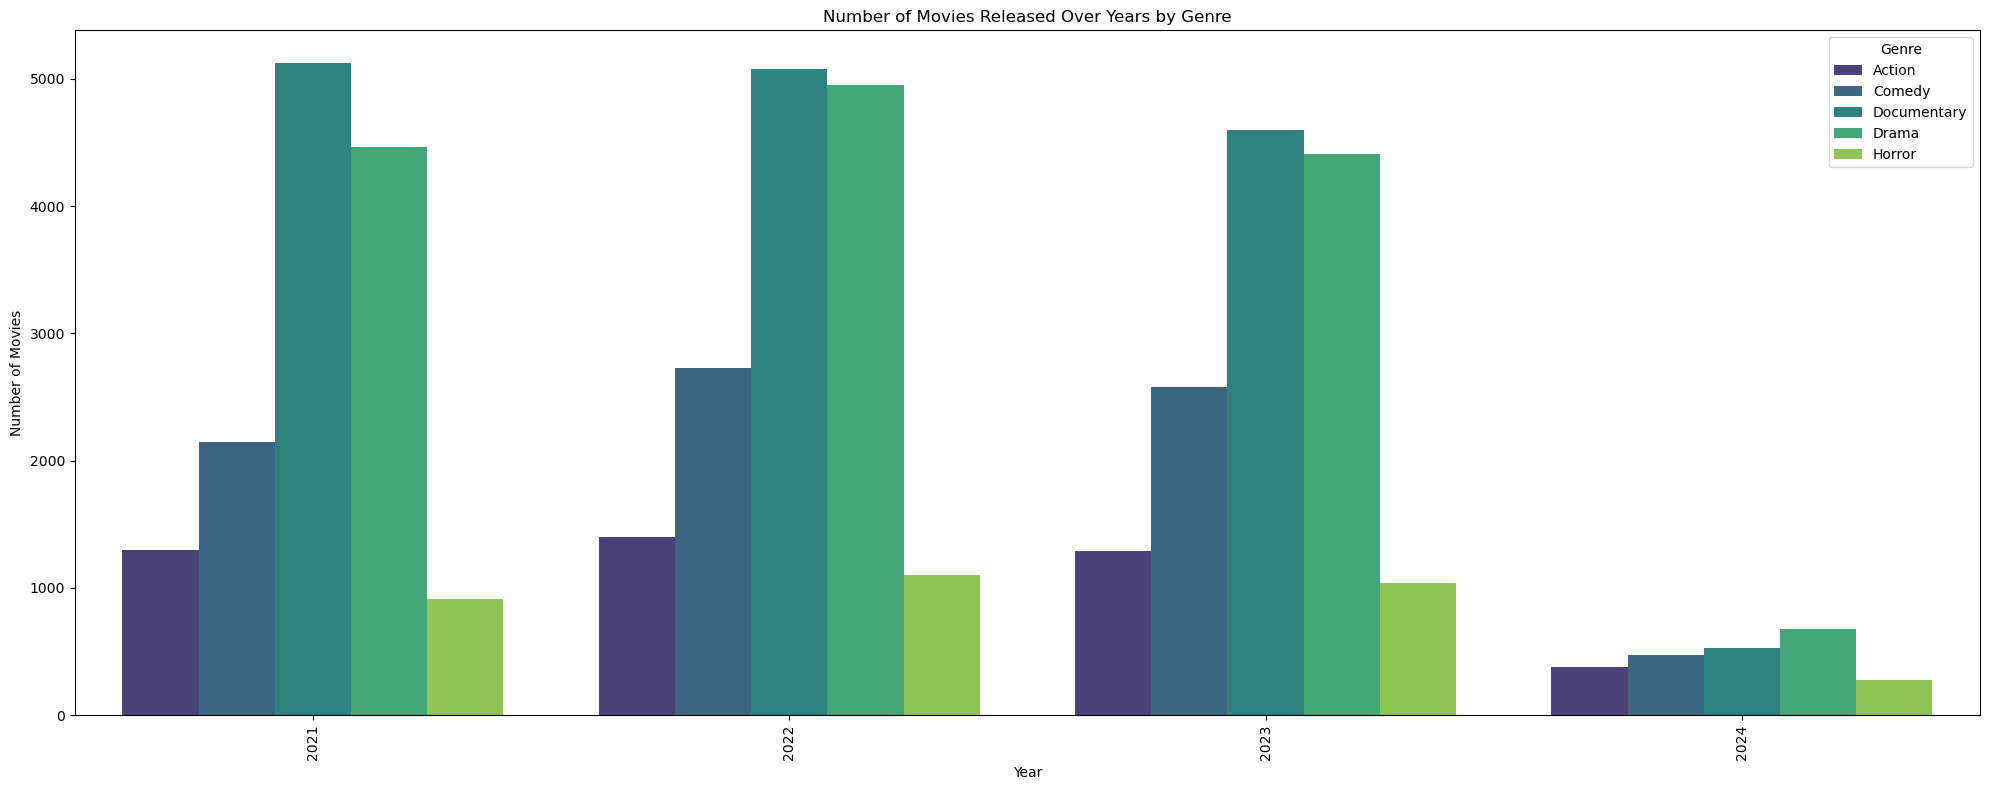

In [17]:


at['FirstGenre'] = at['Genre'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else None)

top_genres = at['FirstGenre'].value_counts().nlargest(5).index

at_top_genres = at[at['FirstGenre'].isin(top_genres)]


plt.figure(figsize=(20, 8))
sns.countplot(x='Année', hue='FirstGenre', data=at_top_genres, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Movies Released Over Years by Genre')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')

plt.tight_layout()
plt.show()

In [89]:
cursor.execute('''SELECT
    nb."primaryName" AS "NomActeur",
    COUNT(Tb."primaryTitle") as "num"
FROM
    "titleBasics" tb
JOIN
    "titlePrincipals" tp ON tb."tconst" = tp."tconst"
JOIN
    "namesBasics" nb ON tp."nconst" = nb."nconst"
WHERE 
    tb."titleType" = 'movie' AND (tp."category" = 'actor' OR tp."category" = 'actress')
GROUP BY
   "NomActeur",tb."primaryTitle" 
   order by "num" DESC 
''' )

In [90]:
acto= cursor.fetchall()
act = pd.DataFrame(acto , columns=["NomActeur", "NumberOfMovies"] )
act

,NomActeur,NumberOfMovies
0,Martin Hroch,20
1,Matsunosuke Onoe,5
2,Matsunosuke Onoe,4
3,Matsunosuke Onoe,4
4,Marky Delgado,4
...,...,...
2072155,Bonnie McBride,0
2072156,Landen James,0
2072157,Israel Adam,0
2072158,Linda Alcazar,0


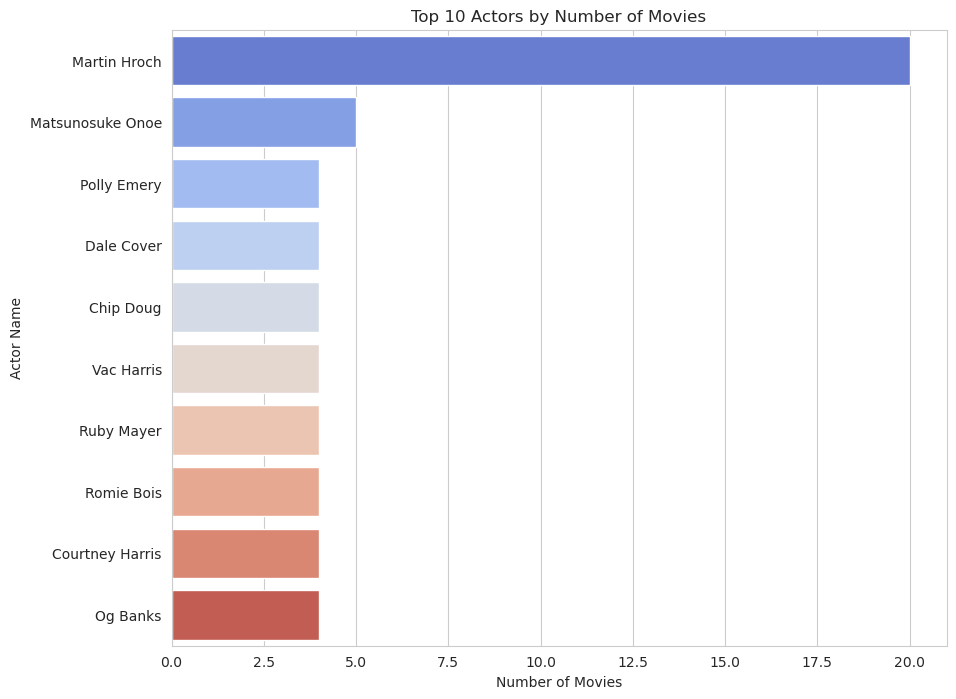

In [91]:
plt.figure(figsize=(10, 8)) 
sns.barplot(
    x='NumberOfMovies',
    y='NomActeur',
    data=act.sort_values('NumberOfMovies', ascending=False).head(10),
    palette='coolwarm'
)

plt.title('Top 10 Actors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor Name')

plt.show()

In [43]:
cursor.execute('''SELECT
    nb."primaryName" AS "WriterName",
    count(nb."primaryName") AS "numbermovie"
    
FROM
    "titleBasics" tb
JOIN
    "titlePrincipals" tp ON tb."tconst" = tp."tconst"
JOIN
    "namesBasics" nb ON tp."nconst" = nb."nconst"
WHERE 
   tb."titleType" = 'movie' AND tp."category" =  'writer'
GROUP BY "WriterName" 
order by numbermovie DESC
                                                                                               
; ''' )

In [12]:
num = cursor.fetchall()
dm  = pd.DataFrame(num , columns=[ "WriterName"  , "numbermovie"] )
dm


,WriterName,numbermovie


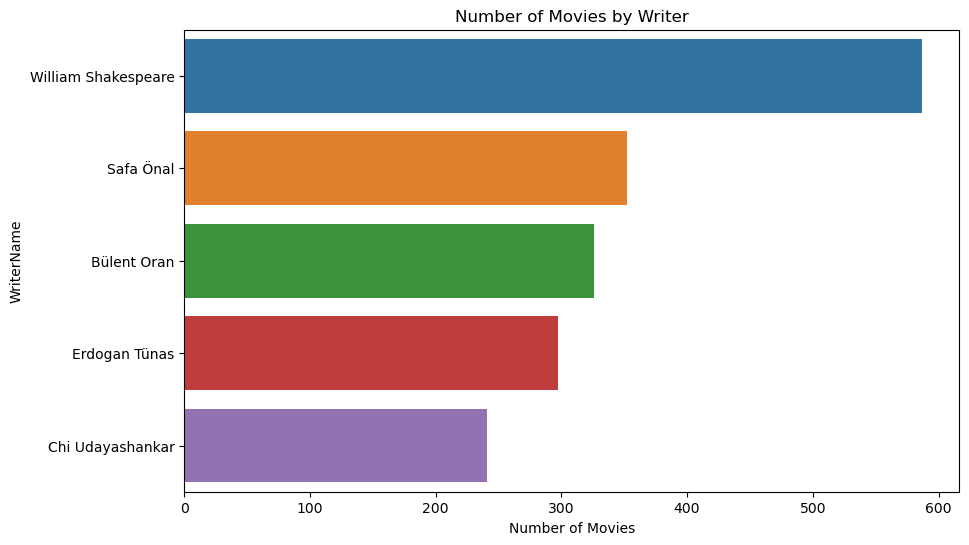

In [47]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='numbermovie', y='WriterName', data= dm.head(5))

plt.title('Number of Movies by Writer')
plt.xlabel('Number of Movies')
plt.ylabel('WriterName')
plt.show()

In [52]:
cursor.execute('''SELECT
    tb."startYear" AS "Year",
    tb."originalTitle" AS "Titre",                        
    tb."genres" AS "Genres",
    AVG(tr."averageRating") AS "AvgRating",
    COUNT(tb."tconst") AS "MovieCount"
    
FROM
    "titleBasics" AS tb
JOIN
    "titleRatings" AS tr ON tb."tconst" = tr."tconst"
WHERE
    tb."genres" IS NOT NULL
GROUP BY
    tb."startYear", tb."genres", tb."originalTitle"
                 
; ''' )

In [53]:
map = cursor.fetchall()
hmap = df  = pd.DataFrame(map , columns=["Year", "Titre", "Genres", "AvgRating", "MovieCount" ] )

In [54]:
df['Genres'] = df['Genres'].str.split(',')

# Explode the 'Genres' lists into separate rows
df_exploded = df.explode('Genres')
genre_counts = df_exploded['Genres'].value_counts()

df_mod = df_exploded.groupby(['Year', 'Genres']).agg({'AvgRating': 'mean'}).reset_index()

pivot_table = df_mod.pivot(index='Year', columns='Genres', values='AvgRating')

genre_counts = df_exploded['Genres'].value_counts()

Text(0, 0.5, 'No of movies released')

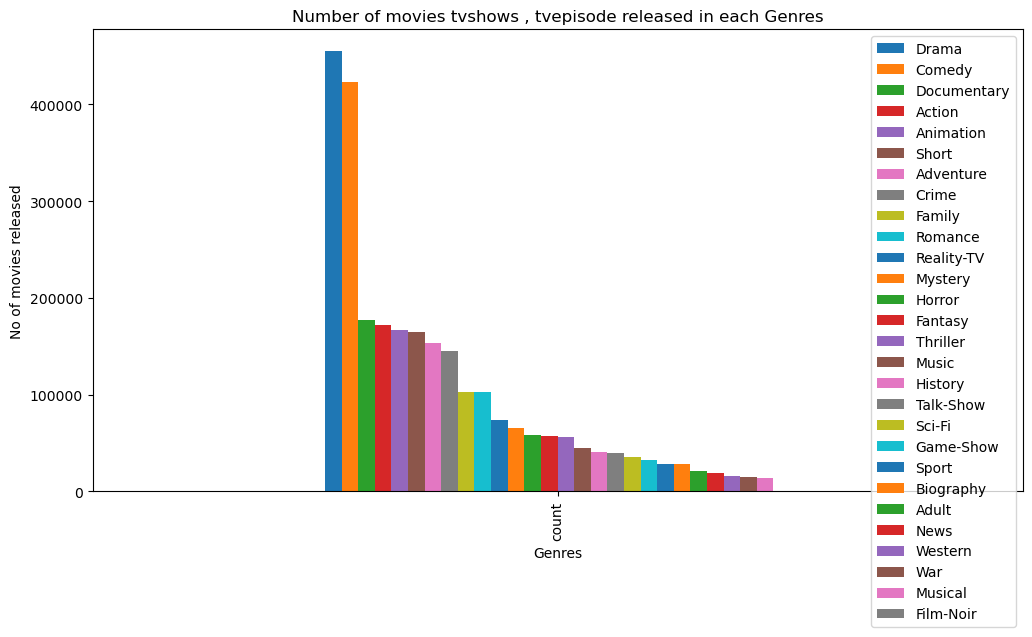

In [55]:
df=pd.DataFrame.from_dict([ genre_counts ])
df.columns=list(genre_counts.keys())
df.plot.bar(figsize=(12,6))
plt.title("Number of movies tvshows , tvepisode released in each Genres")
plt.xlabel("Genres")
plt.ylabel("No of movies released")

In [78]:
cursor.execute('''SELECT
    nb."primaryName" AS "WriterName",
    tp."category" AS "Catégorie",
    tc."directors" AS "directors"
FROM

    "titlePrincipals" tp
JOIN
    "namesBasics" nb ON tp."nconst" = nb."nconst"
JOIN
    "titleCrew" tc ON tp."tconst" = tc."tconst"
WHERE 
 tp."category" =  'director'
group by "WriterName" , "directors", "Catégorie"
                                                                                               
; ''')

In [79]:
map = cursor.fetchall()
ddi = pd.DataFrame(map , columns=[ "WriterName","Catégorie","directors"  ] )
ddi

,WriterName,Catégorie,directors
0,$OY,director,nm14192244
1,0010x0010,director,nm5315499
2,100%,director,nm10112377
3,100%,director,"nm10112377,nm3513211"
4,1111 Customs,director,"nm13831462,nm11204312,nm15355890"
...,...,...,...
1132147,Þorvarður Björgúlfsson,director,"nm2117745,nm8368453,nm0439686"
1132148,Þráinn Bertelsson,director,nm0077881
1132149,Þráinn Guðbrandsson,director,nm11395395
1132150,Þrándur Thoroddsen,director,nm7774358


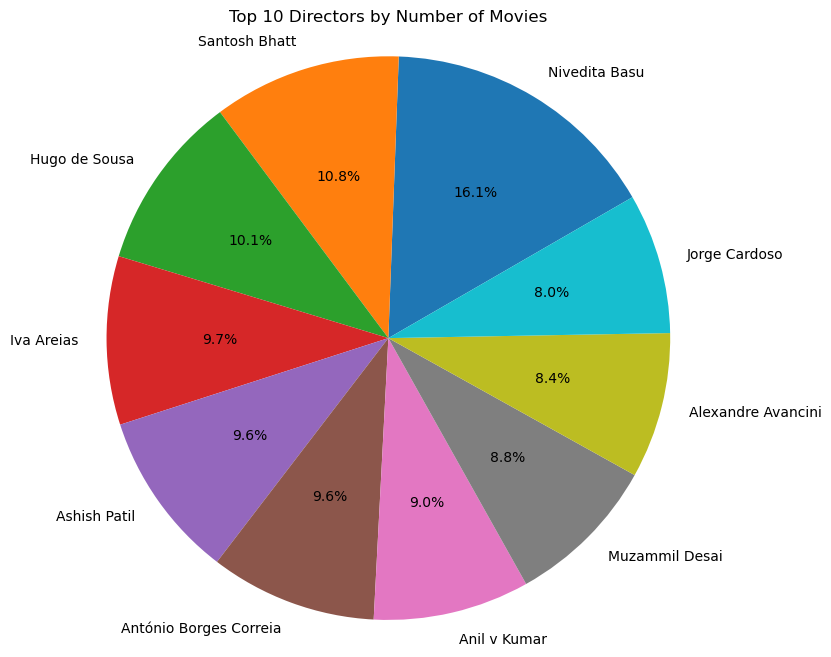

In [80]:

director_counts= ddi['WriterName'].value_counts()[:10]

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(director_counts, labels=director_counts.index, autopct='%1.1f%%', startangle=30)
plt.title('Top 10 Directors by Number of Movies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [81]:
cursor.execute("""
 SELECT
    tb."primaryTitle" AS series_name,
    COUNT(te."episodeNumber") AS nep
FROM
   "titleBasics" AS tb
JOIN
    "titleEpisode" AS te ON tb."tconst" = te."parentTconst"
JOIN
     "titleBasics" AS tb2 ON te."tconst" = tb2."tconst"
WHERE
    tb."titleType" = 'tvSeries' AND tb2."titleType" = 'tvEpisode'
GROUP BY
    series_name
ORDER BY
    nep DESC
LIMIT 10;
               ;
""")

In [82]:
epis = cursor.fetchall()
de = pd.DataFrame(epis , columns=[ "primaryTitle",   "episodeNumber"   ] )
de

,primaryTitle,episodeNumber
0,Days of Our Lives,14884
1,The Young and the Restless,13004
2,General Hospital,10920
3,Coronation Street,10778
4,See the World by Train,10674
5,Large Test Series,10000
6,Eat Bulaga,9948
7,ASAP,9638
8,Neighbours,9525
9,Ohayou Tokushima,9502


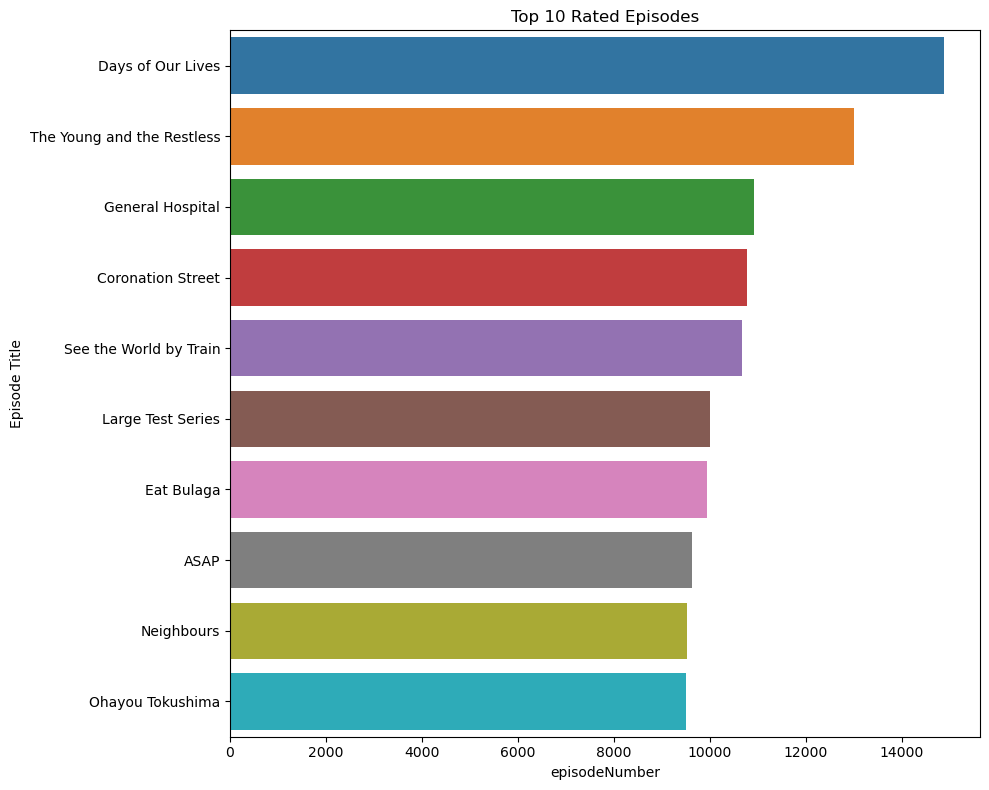

In [83]:
plt.figure(figsize=(10, 8))
sns.barplot(data=de, x='episodeNumber', y='primaryTitle',  dodge=True )
plt.title('Top 10 Rated Episodes')
plt.xlabel('episodeNumber')
plt.ylabel('Episode Title')
plt.tight_layout()
plt.show()

In [87]:
cursor.execute('''SELECT ta."region", COUNT(*) AS "NumberOfFilms"
FROM "titleBasics" tb
JOIN "titleAkas"  ta ON tb."tconst" = ta."titleId"
WHERE tb."titleType" = 'movie'
GROUP BY ta."region"
ORDER BY "NumberOfFilms" DESC                                                                                            
; ''' )

lang = cursor.fetchall()
LANG = pd.DataFrame(lang , columns=["region", "NumberOfFilms"] )

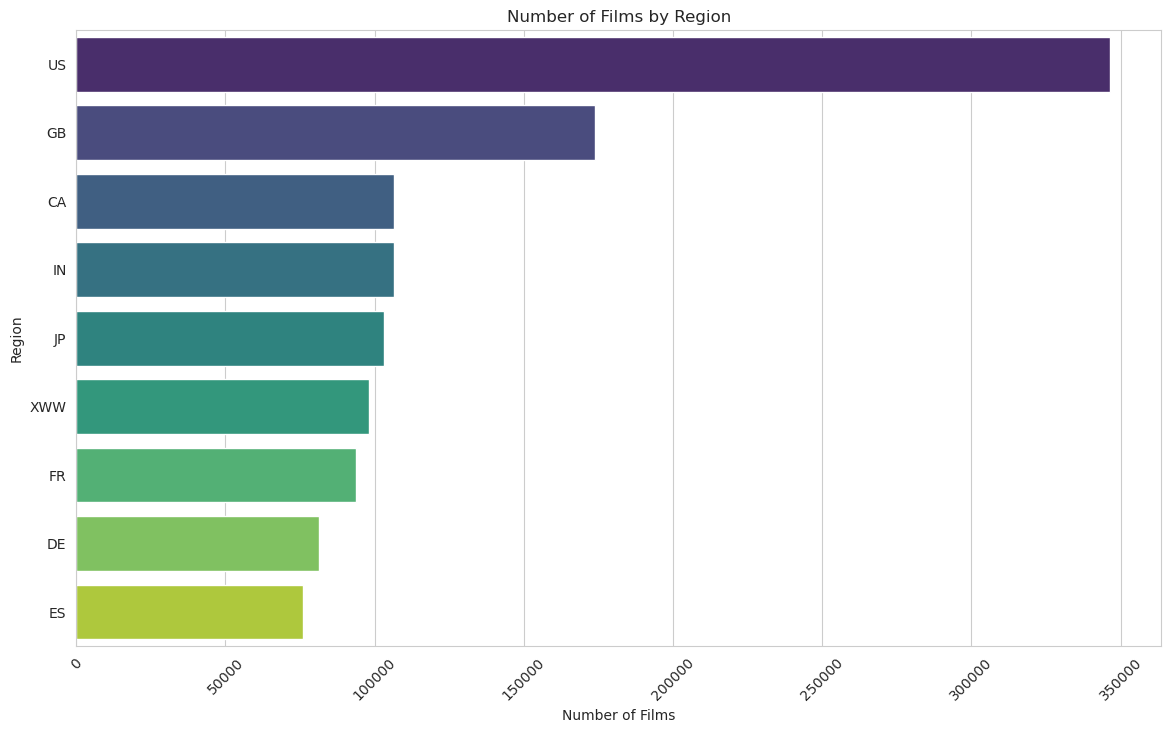

In [88]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))   
barplot = sns.barplot(x='NumberOfFilms', y='region', data=LANG.head(10), palette='viridis')

 
plt.title('Number of Films by Region')
plt.xlabel('Number of Films')
plt.ylabel('Region')

plt.xticks(rotation=45)

plt.show()

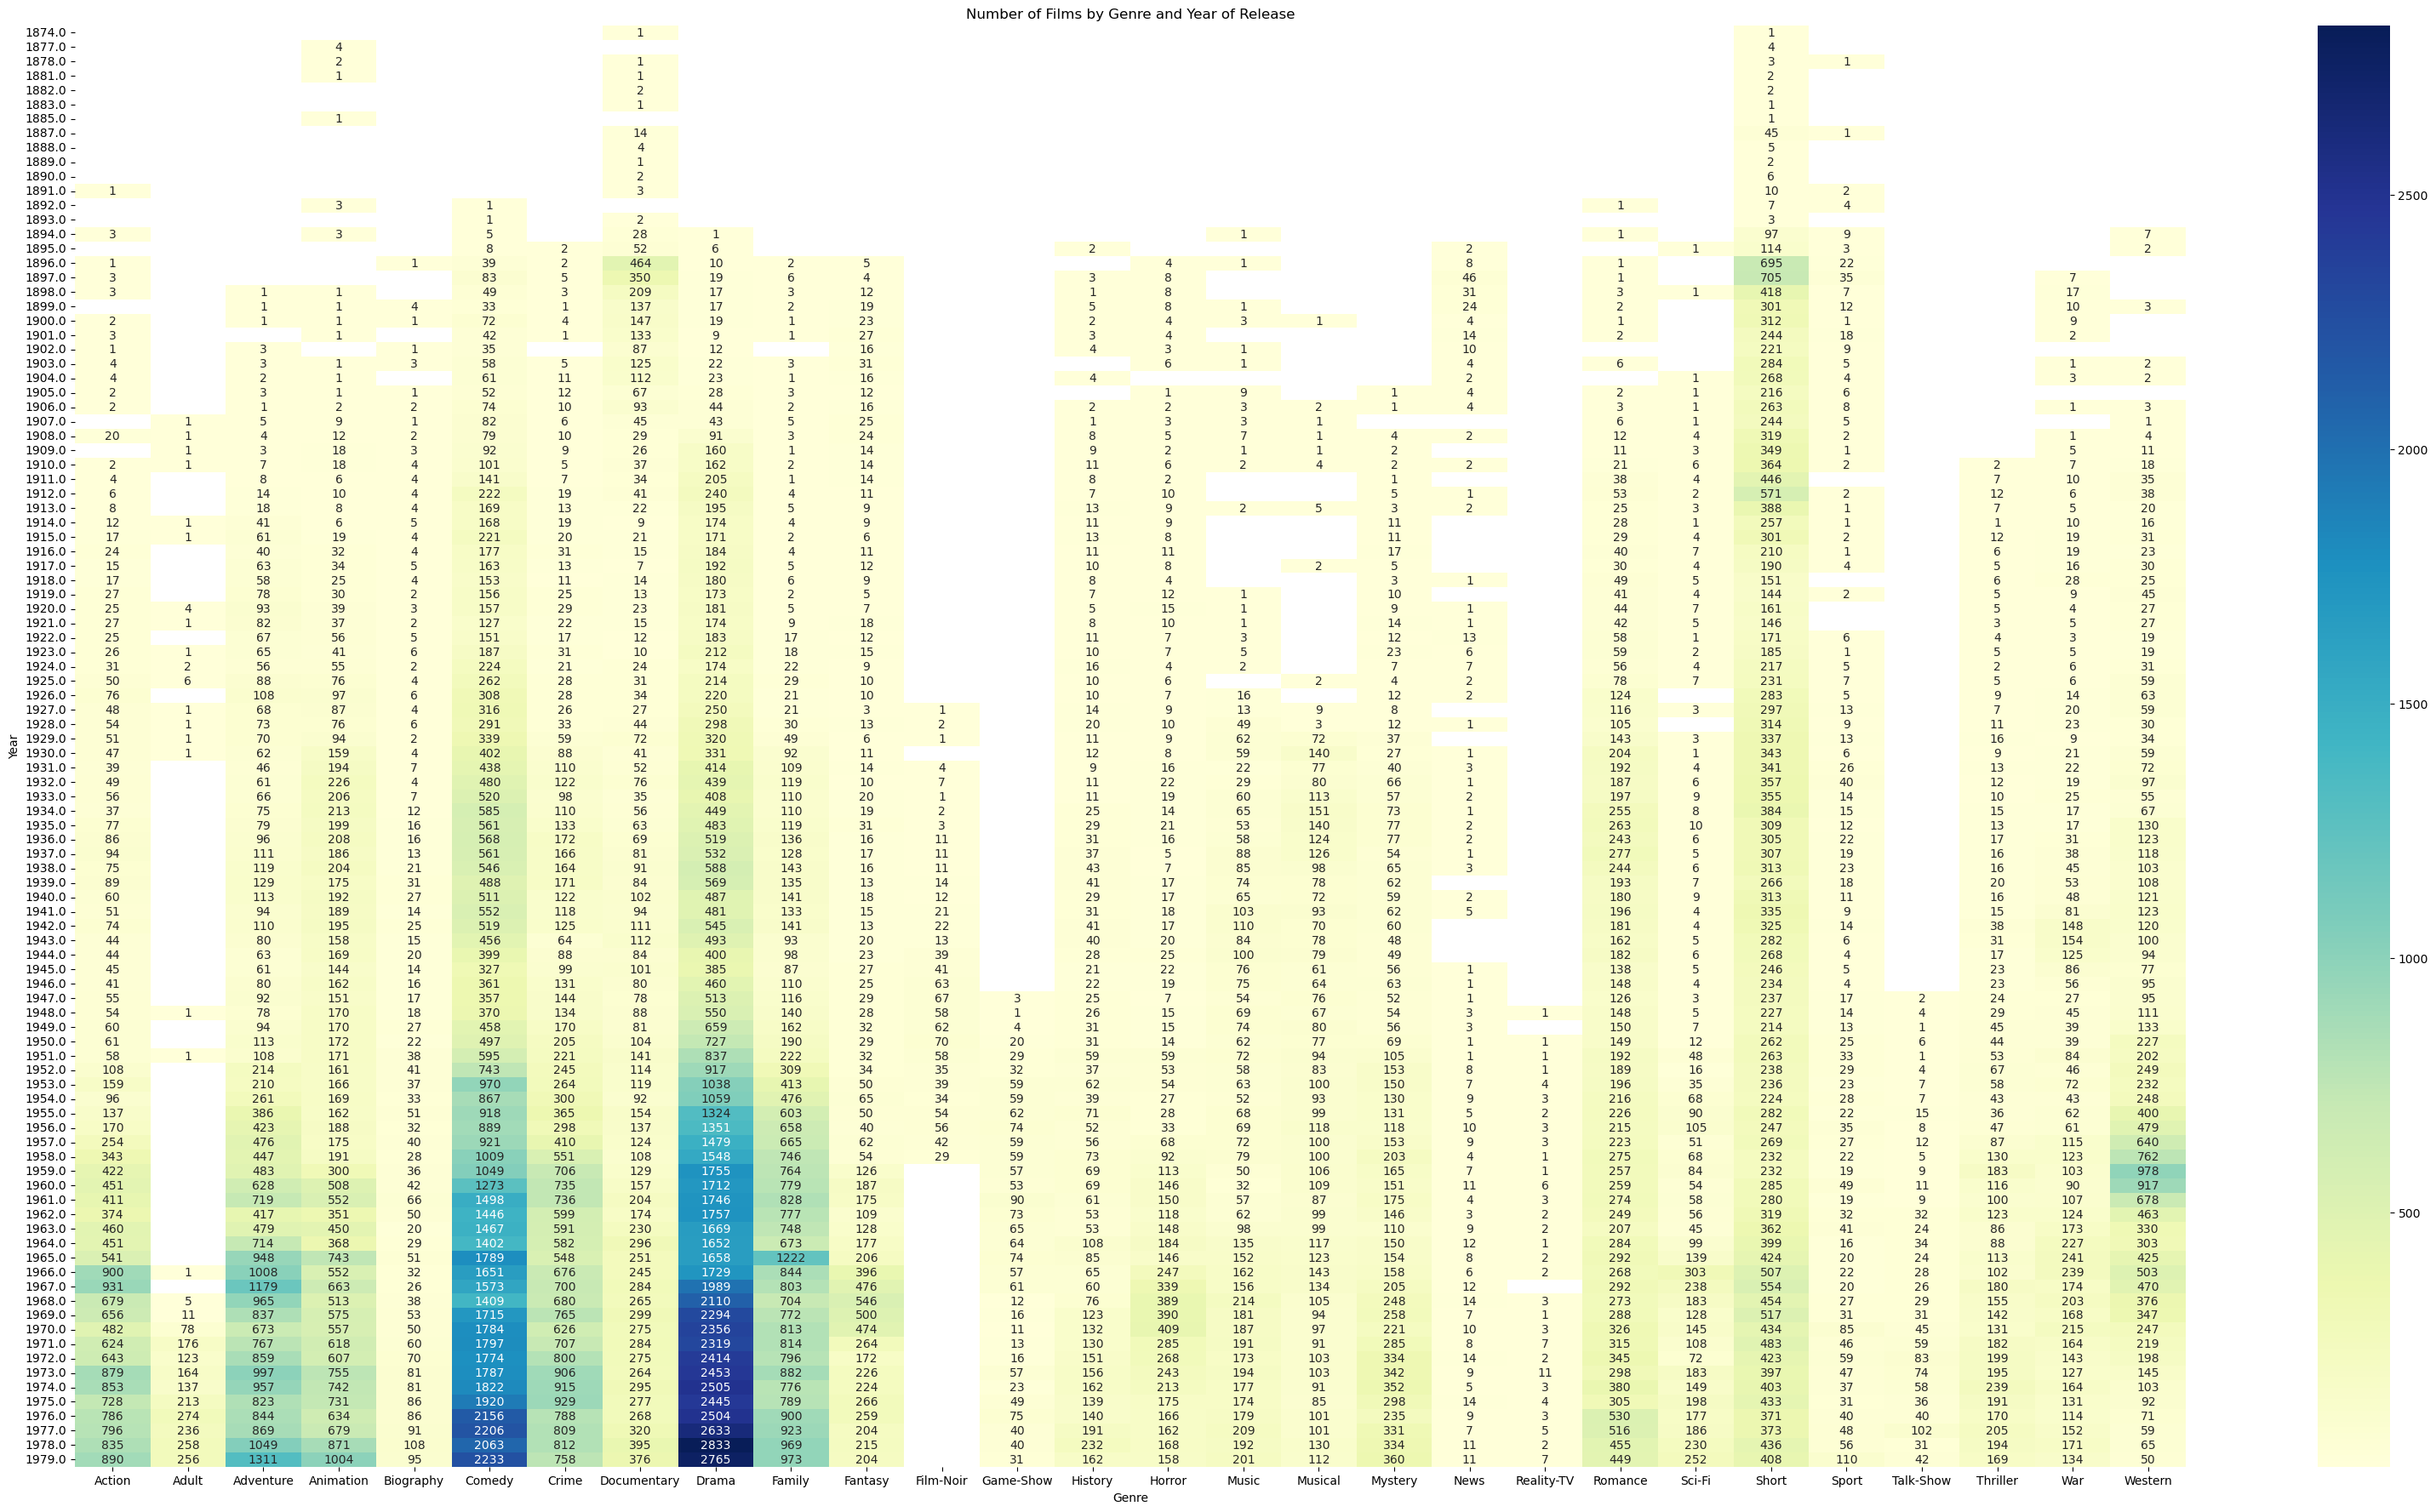

In [84]:
film_counts = df_exploded.groupby(['Year', 'Genres']).size().reset_index(name='count')
film_matrix = film_counts.pivot(index="Year", columns="Genres", values="count")

plt.figure(figsize=(40, 22))
sns.heatmap(film_matrix.head(100), cmap="YlGnBu", annot=True, fmt="g") 
plt.title('Number of Films by Genre and Year of Release')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

In [85]:
correlation =  film_matrix.corr()
correlation

Genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
Genres,,,,,,,,,,,,,,,,,,,,,
Action,1.000000,0.458044,0.993887,0.993806,0.965806,0.986970,0.989513,0.968502,0.990020,0.931550,...,0.943603,0.937641,0.987179,0.972486,0.923623,0.972596,0.934696,0.956643,0.847379,-0.102734
Adult,0.458044,1.000000,0.497629,0.483334,0.348660,0.461539,0.375605,0.395854,0.412233,0.687073,...,0.230334,0.033081,0.415413,0.416940,0.459708,0.325291,0.007142,0.194558,0.398511,-0.240088
Adventure,0.993887,0.497629,1.000000,0.991563,0.953080,0.984324,0.986392,0.959984,0.987564,0.946815,...,0.933817,0.933975,0.978911,0.967558,0.919915,0.963565,0.939135,0.945267,0.866322,-0.060383
Animation,0.993806,0.483334,0.991563,1.000000,0.968450,0.994008,0.985753,0.982358,0.992749,0.930339,...,0.956613,0.947619,0.989951,0.973624,0.952390,0.972812,0.941258,0.951868,0.849610,-0.096421
Biography,0.965806,0.348660,0.953080,0.968450,1.000000,0.982246,0.971177,0.978383,0.976779,0.880222,...,0.964783,0.972340,0.973643,0.985658,0.944487,0.953119,0.951121,0.960311,0.824255,-0.074354
Comedy,0.986970,0.461539,0.984324,0.994008,0.982246,1.000000,0.984141,0.986883,0.993412,0.933623,...,0.963381,0.961656,0.988088,0.986648,0.963296,0.965996,0.947053,0.950484,0.857081,-0.065870
Crime,0.989513,0.375605,0.986392,0.985753,0.971177,0.984141,1.000000,0.970492,0.994688,0.912014,...,0.961170,0.969389,0.989521,0.970204,0.913969,0.982299,0.972589,0.980707,0.859941,-0.029738
Documentary,0.968502,0.395854,0.959984,0.982358,0.978383,0.986883,0.970492,1.000000,0.982241,0.879081,...,0.984395,0.969923,0.983235,0.968183,0.977736,0.972990,0.957804,0.954082,0.825087,-0.084154
Drama,0.990020,0.412233,0.987564,0.992749,0.976779,0.993412,0.994688,0.982241,1.000000,0.925185,...,0.968240,0.974161,0.994302,0.977465,0.939377,0.979473,0.962225,0.972804,0.874534,-0.044160


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

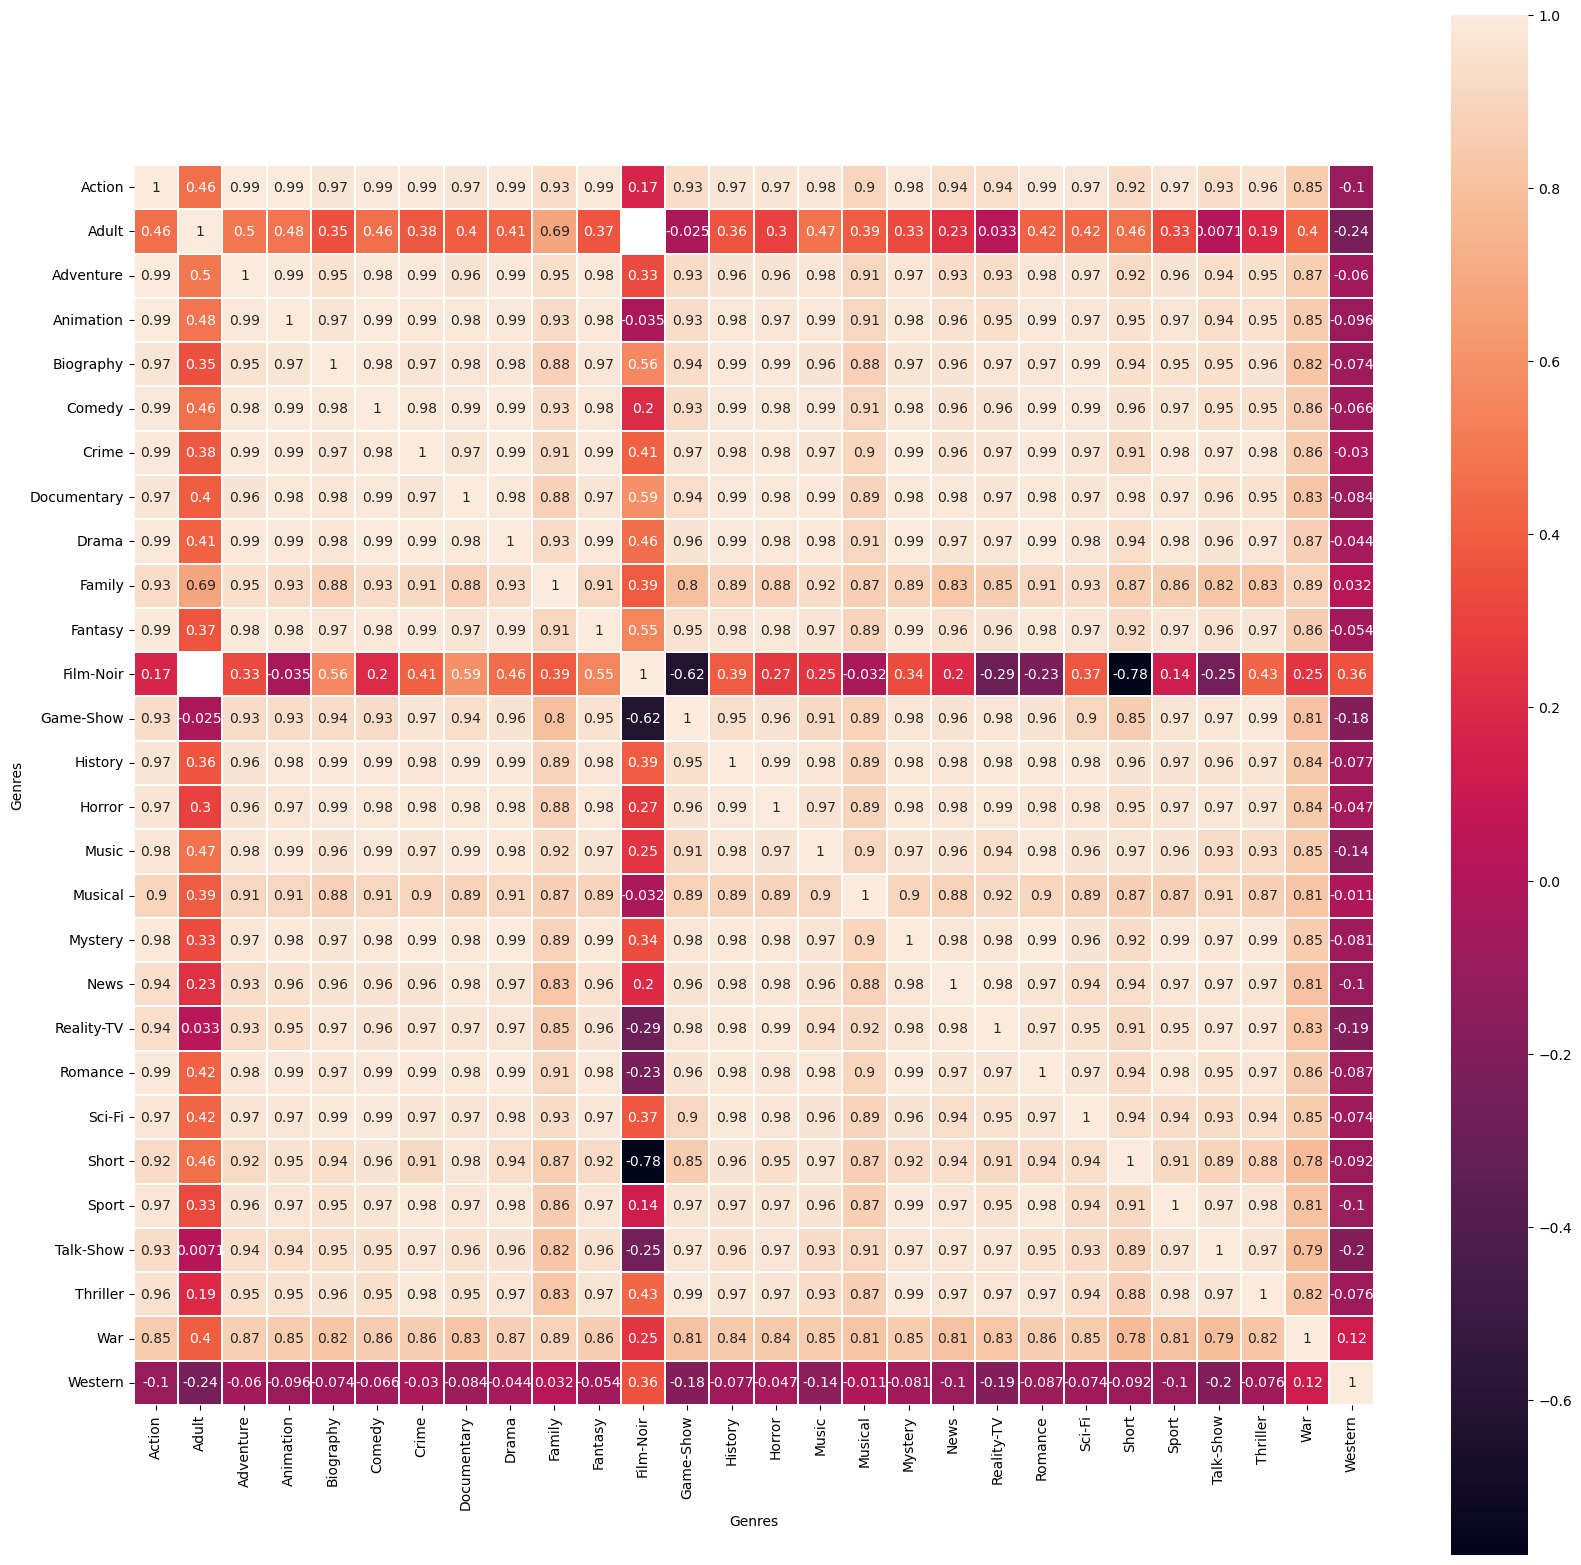

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True,linewidths=0.01,vmax=1,square=True,cbar=True);
sns.heatmap

In [75]:
cursor.close()